In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Date_of_Journey (date time) 
# (Dep_Time date time) 
# (Arrival_Time date) 
# Duration with minutes 
# Total_Stops (number)

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.duplicated().sum()

220

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
# univarte analysis

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
df["Airline"].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [16]:
df["Airline"].value_counts(normalize=True)

Airline
Jet Airways                          0.353661
IndiGo                               0.195278
Air India                            0.161919
Multiple carriers                    0.114318
SpiceJet                             0.077901
Vistara                              0.045689
Air Asia                             0.030491
GoAir                                0.018543
Multiple carriers Premium economy    0.001243
Jet Airways Business                 0.000574
Vistara Premium economy              0.000287
Trujet                               0.000096
Name: proportion, dtype: float64

In [17]:
valid_airline=df["Airline"].value_counts()[df["Airline"].value_counts()>13].index.to_list()

In [18]:
def handle_airline(value):
    if value in valid_airline:
        return value
    else:
        return "other"    
df["Airline"]=df["Airline"].apply(handle_airline)

In [19]:
df["Airline"].value_counts()

Airline
Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
GoAir                 194
other                  23
Name: count, dtype: int64

In [20]:
df["Date_of_Journey"].nunique()

44

In [21]:
df["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [22]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])

C:\Users\Hossam\AppData\Local\Temp\ipykernel_19872\1095084678.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])


In [23]:
df["Date_of_Journey"]

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10457   2019-04-09
10458   2019-04-27
10459   2019-04-27
10460   2019-03-01
10461   2019-05-09
Name: Date_of_Journey, Length: 10462, dtype: datetime64[ns]

In [24]:
df["Day_of_Journey"]=df["Date_of_Journey"].dt.day_name()

In [25]:
df["Month_of_Journey"]=df["Date_of_Journey"].dt.month_name()

In [26]:
df["Year_of_Journey"]=df["Date_of_Journey"].dt.year

In [27]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [28]:
df["Source"].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [29]:
df["Source"].value_counts(normalize=True)

Source
Delhi       0.415313
Kolkata     0.273370
Banglore    0.208278
Mumbai      0.066622
Chennai     0.036418
Name: proportion, dtype: float64

In [30]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [31]:
df["Destination"].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [32]:
df["Destination"].value_counts(normalize=True)

Destination
Cochin       0.415313
Banglore     0.273370
Delhi        0.120914
New Delhi    0.087364
Hyderabad    0.066622
Kolkata      0.036418
Name: proportion, dtype: float64

In [33]:
df.drop(['Route'],axis=1,inplace=True)

In [34]:
df.duplicated().sum()

0

In [35]:
df['Dep_Time'].nunique()

222

In [36]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Day_of_Journey', 'Month_of_Journey', 'Year_of_Journey'],
      dtype='object')

In [37]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

C:\Users\Hossam\AppData\Local\Temp\ipykernel_19872\4255200870.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time']=pd.to_datetime(df['Dep_Time'])


In [38]:
df['Dep_Time']=df['Dep_Time'].dt.hour

In [39]:
df['Dep_Time'].value_counts()

Dep_Time
9     886
7     863
8     694
17    689
6     675
20    649
5     582
11    579
19    544
10    527
14    505
21    489
16    461
18    441
13    411
22    373
15    319
2     194
12    178
4     169
23    133
0      40
1      37
3      24
Name: count, dtype: int64

In [40]:
def handle_Dep_Time(time):
    try:
        if (time >=1) & (time <=12):
            return "Am"
        else:
            return "Pm"    
    except:
        return np.nan     
df['Dep_Time_Hour']=df['Dep_Time'].apply(handle_Dep_Time)

In [41]:
df.drop("Dep_Time",axis=1,inplace=True)

In [42]:
df.duplicated().sum()

0

In [43]:
df['Dep_Time_Hour'].value_counts()

Dep_Time_Hour
Am    5408
Pm    5054
Name: count, dtype: int64

In [44]:
df["Arrival_Time"].nunique()

1343

In [45]:
df["Arrival_Time"].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [46]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

C:\Users\Hossam\AppData\Local\Temp\ipykernel_19872\2080972691.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])


In [47]:
df[(df['Arrival_Time'].dt.month < df["Date_of_Journey"].dt.month) | (df['Arrival_Time'].dt.day < df["Date_of_Journey"].dt.day)][["Date_of_Journey",'Arrival_Time']]

,Date_of_Journey,Arrival_Time
0,2019-03-24,2024-03-22 01:10:00
1,2019-05-01,2024-01-12 13:15:00
3,2019-05-12,2024-01-12 23:30:00
4,2019-03-01,2024-01-12 21:35:00
5,2019-06-24,2024-01-12 11:25:00
...,...,...
10457,2019-04-09,2024-01-12 22:25:00
10458,2019-04-27,2024-01-12 23:20:00
10459,2019-04-27,2024-01-12 11:20:00
10460,2019-03-01,2024-01-12 14:10:00


In [48]:
error_index=df[(df['Arrival_Time'].dt.month < df["Date_of_Journey"].dt.month) | (df['Arrival_Time'].dt.day < df["Date_of_Journey"].dt.day)].index.to_list()

In [49]:
len(error_index)

6409

In [50]:
df.drop(index=error_index,axis=0,inplace=True)

In [51]:
df.reset_index(drop=True,inplace=True)

In [52]:
df.drop(columns=["Date_of_Journey"],axis=1,inplace=True)
df.duplicated().sum()

0

In [53]:
df["Arrival_day"]=df["Arrival_Time"].dt.day_name()
df["Arrival_month"]=df["Arrival_Time"].dt.month_name()
df["Arrival_Hour"]=df["Arrival_Time"].dt.hour

In [54]:
df["Arrival_day"].value_counts()

Arrival_day
Thursday     851
Friday       715
Tuesday      649
Sunday       598
Monday       563
Wednesday    401
Saturday     276
Name: count, dtype: int64

In [55]:
df["Arrival_month"].value_counts()

Arrival_month
May      1484
June     1328
March     985
April     256
Name: count, dtype: int64

In [56]:
df["Arrival_Hour"].value_counts()

Arrival_Hour
4     656
1     524
19    472
12    386
9     336
0     311
7     198
10    185
8     178
18    171
2      77
16     71
20     66
23     65
11     64
5      59
14     54
22     50
13     47
21     32
6      19
3      16
15     14
17      2
Name: count, dtype: int64

In [57]:
def handle_Arrival_Hour(time):
    try:
        if (time >=1) & (time <=12):
            return "Am"
        else:
            return "Pm"    
    except:
        return np.nan     
df['Arrival_Hour']=df['Arrival_Hour'].apply(handle_Arrival_Hour)

In [58]:
df["Arrival_Hour"].value_counts()

Arrival_Hour
Am    2698
Pm    1355
Name: count, dtype: int64

In [59]:
df.drop(columns=["Arrival_Time"],axis=1,inplace=True)
df.duplicated().sum()

217

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.duplicated().sum()

0

In [62]:
df.reset_index(drop=True,inplace=True)

In [63]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Dep_Time_Hour', 'Arrival_day', 'Arrival_month',
       'Arrival_Hour'],
      dtype='object')

In [64]:
df["Duration"].isna().sum()

0

In [65]:
df["Duration"]

0           19h
1       15h 30m
2        21h 5m
3       25h 30m
4       12h 10m
         ...   
3831    20h 10m
3832     17h 5m
3833    24h 45m
3834    21h 25m
3835    24h 45m
Name: Duration, Length: 3836, dtype: object

In [66]:
df["Duration"]=df["Duration"].str.split(" ")

In [67]:
df["Duration"]

0            [19h]
1       [15h, 30m]
2        [21h, 5m]
3       [25h, 30m]
4       [12h, 10m]
           ...    
3831    [20h, 10m]
3832     [17h, 5m]
3833    [24h, 45m]
3834    [21h, 25m]
3835    [24h, 45m]
Name: Duration, Length: 3836, dtype: object

In [68]:
def handle_Duration(value):
    try:
        if len(value)>1:
            hours=int(value[0].split("h")[0])
            minutes=int(value[1].split("m")[0])
            return (hours*60)+minutes
        else:
            hours=int(value[0].split("h")[0])
            return (hours*60)
    except:
        return np.NaN
df["Duration_with_minutes"]=df["Duration"].apply(handle_Duration)     

In [69]:
df.drop("Duration",axis=1,inplace=True)

In [70]:
df.duplicated().sum()

0

In [71]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      2484
2 stops      965
non-stop     357
3 stops       29
4 stops        1
Name: count, dtype: int64

In [72]:
def handle_Total_Stops(value):
    try:
        if value=="non-stop":
            return 0
        else:
            return value[:2]    
    except:
        return np.NaN
df["Total_Stops"]=df["Total_Stops"].apply(handle_Total_Stops)            

In [73]:
df["Total_Stops"]=df["Total_Stops"].astype("int")

In [74]:
df["Additional_Info"].value_counts()

Additional_Info
No info                         2759
In-flight meal not included     1004
No check-in baggage included      57
1 Long layover                    12
Change airports                    2
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [75]:
df["Additional_Info"].value_counts(normalize=True)

Additional_Info
No info                         0.719239
In-flight meal not included     0.261731
No check-in baggage included    0.014859
1 Long layover                  0.003128
Change airports                 0.000521
Red-eye flight                  0.000261
2 Long layover                  0.000261
Name: proportion, dtype: float64

In [76]:
df.drop("Additional_Info",axis=1,inplace=True)

In [77]:
df.duplicated().sum()

1

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.reset_index(drop=True,inplace=True)

In [80]:
df["Price"].describe()

count     3835.000000
mean     10983.787484
std       4178.363832
min       1759.000000
25%       8283.000000
50%      10861.000000
75%      13584.000000
max      52285.000000
Name: Price, dtype: float64

In [81]:
px.histogram(data_frame=df,x="Price") # should be log

In [82]:
px.histogram(data_frame=df,x="Price",log_x=True)

In [83]:
df.describe()

,Total_Stops,Price,Year_of_Journey,Duration_with_minutes
count,3835.000000,3835.000000,3835.0,3835.00000
mean,1.174446,10983.787484,2019.0,1044.27249
std,0.589044,4178.363832,0.0,507.56821
min,0.000000,1759.000000,2019.0,85.00000
25%,1.000000,8283.000000,2019.0,640.00000
50%,1.000000,10861.000000,2019.0,1090.00000
75%,2.000000,13584.000000,2019.0,1450.00000
max,4.000000,52285.000000,2019.0,2860.00000


In [84]:
px.box(data_frame=df,x="Price")

In [85]:
df.describe(include="O")

,Airline,Source,Destination,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Arrival_day,Arrival_month,Arrival_Hour
count,3835,3835,3835,3835,3835,3835,3835,3835,3835
unique,9,5,6,7,4,2,7,4,2
top,Jet Airways,Delhi,Cochin,Wednesday,May,Pm,Thursday,May,Am
freq,1959,1920,1920,796,1431,2790,813,1431,2564


In [86]:
# bi variante 

In [87]:
df["Airline"].value_counts()

Airline
Jet Airways          1959
Air India             856
IndiGo                358
Multiple carriers     272
Vistara               142
SpiceJet              124
Air Asia              101
GoAir                  20
other                   3
Name: count, dtype: int64

In [88]:
df.groupby("Airline")["Price"].agg("mean").sort_values(ascending=False).to_frame()

,Price
Airline,
other,36553.333333
Jet Airways,12573.275140
Multiple carriers,11434.742647
Air India,11050.021028
Vistara,9500.028169
GoAir,7859.350000
IndiGo,6336.388268
Air Asia,5921.633663
SpiceJet,3551.193548


In [89]:
df_fig=df.groupby("Airline")["Price"].agg("mean").sort_values(ascending=False).to_frame()

In [90]:
px.bar(data_frame=df_fig,y="Price",template="none",color_discrete_sequence=px.colors.qualitative.Pastel1)

In [91]:
df.groupby(["Airline","Source","Destination"])[["Price","Duration_with_minutes"]].agg("mean").sort_values(by=["Source","Destination"],ascending=False)

,,,Price,Duration_with_minutes
Airline,Source,Destination,,
Air India,Mumbai,Hyderabad,13473.894737,1532.631579
Jet Airways,Mumbai,Hyderabad,21535.000000,1444.375000
SpiceJet,Mumbai,Hyderabad,2345.114286,88.571429
Vistara,Mumbai,Hyderabad,12346.538462,1315.000000
Air Asia,Kolkata,Banglore,4718.894737,270.000000
Air India,Kolkata,Banglore,11090.594855,1339.437299
GoAir,Kolkata,Banglore,7859.350000,476.250000
IndiGo,Kolkata,Banglore,4998.782609,187.246377
Jet Airways,Kolkata,Banglore,11499.105068,1154.592089


In [92]:
df.groupby(["Month_of_Journey","Day_of_Journey","Dep_Time_Hour"])["Price"].agg("mean").sort_values(ascending=False).to_frame()

Price
Month_of_Journey Day_of_Journey Dep_Time_Hour              
March            Friday         Pm             17421.762712
                                Am             17008.608696
                 Sunday         Am             13938.513889
                 Saturday       Am             12990.281250
                 Wednesday      Am             12828.594059
                                Pm             12676.304569
                 Sunday         Pm             12565.685535
                 Saturday       Pm             12507.766667
                 Tuesday        Am             12475.352941
                                Pm             12008.523077
May              Friday         Am             11800.250000
                 Thursday       Am             11606.600000
                 Sunday         Am             11521.892857
                 Saturday       Am             11462.714286
                 Wednesday      Am             11450.403226
                 Monday         Am             11445.575758
                 Saturday       Pm             11368.701220
                 Tuesday        Pm             11363.431138
June             Sunday         Am             11217.716418
May              Tuesday        Am             11096.296875
                 Thursday       Pm             11037.373418
June             Wednesday      Am             10938.650794
                 Thursday       Pm             10827.546610
                                Am             10750.926829
                 Sunday         Pm             10731.403614
May              Monday         Pm             10721.723077
June             Saturday       Am             10680.872727
                 Monday         Am             10494.795918
                                Pm             10399.973684
                 Saturday       Pm             10285.123077
May              Wednesday      Pm             10220.558511
                 Sunday         Pm             10130.518519
June             Wednesday      Pm             10044.943038
May              Friday         Pm              9941.174757
March            Thursday       Am              9757.956522
April            Monday         Am              9183.333333
March            Thursday       Pm              9012.232558
April            Tuesday        Am              8300.818182
                 Monday         Pm              8243.298969
                 Tuesday        Pm              7087.194444
                 Saturday       Am              5417.000000
                 Sunday         Pm              5290.000000
                 Friday         Pm              5153.375000
                 Wednesday      Am              4941.000000
                 Thursday       Pm              4599.888889
                 Saturday       Pm              4597.238095
                 Wednesday      Pm              4380.181818
June             Friday         Pm              4084.153846
March            Monday         Pm              3862.750000
June             Tuesday        Pm              3764.500000

In [93]:
df.groupby(["Arrival_month","Arrival_day","Arrival_Hour"])["Price"].agg("mean").sort_values(ascending=False).to_frame()

Price
Arrival_month Arrival_day Arrival_Hour              
March         Saturday    Am            17563.000000
                          Pm            15372.305556
              Monday      Am            14273.351351
              Sunday      Pm            13846.550000
                          Am            13712.203390
              Thursday    Am            12480.856502
              Tuesday     Am            12359.500000
              Thursday    Pm            12245.336957
              Monday      Pm            12088.846154
May           Wednesday   Am            11612.435897
              Sunday      Am            11466.560510
March         Wednesday   Am            11448.863636
May           Friday      Am            11421.774194
              Sunday      Pm            11233.828571
              Monday      Am            11210.823529
June          Monday      Am            11098.320000
March         Wednesday   Pm            11060.150000
May           Tuesday     Am            10968.243094
              Saturday    Am            10957.837500
June          Friday      Pm            10828.384615
                          Am            10768.687500
May           Wednesday   Pm            10697.631579
              Tuesday     Pm            10628.961538
June          Sunday      Am            10579.732394
May           Friday      Pm            10561.241935
              Thursday    Pm            10547.813953
June          Tuesday     Am            10519.710526
              Monday      Pm            10518.940476
May           Thursday    Am            10504.286585
June          Thursday    Am            10310.042683
                          Pm            10269.982456
              Tuesday     Pm            10067.208333
March         Friday      Am             9747.512195
June          Sunday      Pm             9686.976190
May           Monday      Pm             9597.255814
              Saturday    Pm             9544.036364
March         Friday      Pm             9524.888889
April         Tuesday     Am             8500.402985
                          Pm             8292.607843
              Wednesday   Am             7930.781250
June          Saturday    Am             7788.285714
April         Wednesday   Pm             6177.533333
              Saturday    Am             6131.666667
              Monday      Am             5494.250000
June          Wednesday   Am             5474.200000
April         Monday      Pm             5153.833333
              Sunday      Am             5005.875000
              Thursday    Am             4654.200000
              Friday      Pm             4652.666667
              Saturday    Pm             4566.400000
              Friday      Am             4494.333333
              Thursday    Pm             4271.333333
June          Saturday    Pm             4209.333333
April         Sunday      Pm             4087.375000
June          Wednesday   Pm             3827.750000
March         Tuesday     Pm             3712.500000

In [94]:
px.scatter(data_frame=df,x="Duration_with_minutes",y="Price")

In [95]:
df[df.select_dtypes(include="number").columns.to_list()].corr()

,Total_Stops,Price,Year_of_Journey,Duration_with_minutes
Total_Stops,1.000000,0.462161,NaN,0.591955
Price,0.462161,1.000000,NaN,0.341750
Year_of_Journey,NaN,NaN,NaN,NaN
Duration_with_minutes,0.591955,0.341750,NaN,1.000000


<Axes: >

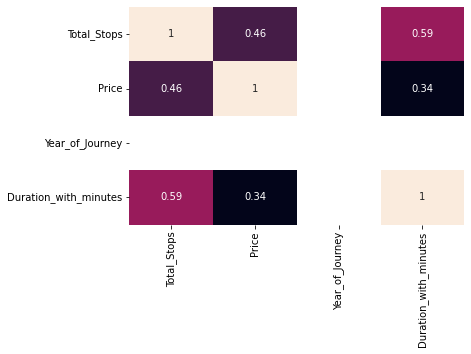

In [96]:
sns.heatmap(df[df.select_dtypes(include="number").columns.to_list()].corr(),annot=True,cbar=False)

In [97]:
df.drop(columns=['Year_of_Journey','Arrival_month','Arrival_Hour','Arrival_day'],axis=1,inplace=True)

In [98]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_Time_Hour',
       'Duration_with_minutes'],
      dtype='object')

In [99]:
df.dtypes

Airline                  object
Source                   object
Destination              object
Total_Stops               int32
Price                     int64
Day_of_Journey           object
Month_of_Journey         object
Dep_Time_Hour            object
Duration_with_minutes     int64
dtype: object

In [100]:
# data preprocessing

In [101]:
cat_columns=df.select_dtypes(include="object").columns.to_list()
num_columns=df.select_dtypes(exclude="object").columns.to_list()

In [102]:
for col in cat_columns:
    print(f"{col} : {df[col].nunique()}")
    print(10*"*")

Airline : 9
**********
Source : 5
**********
Destination : 6
**********
Day_of_Journey : 7
**********
Month_of_Journey : 4
**********
Dep_Time_Hour : 2
**********


In [103]:
num_columns

['Total_Stops', 'Price', 'Duration_with_minutes']

In [104]:
px.histogram(data_frame=df,x="Total_Stops")

In [105]:
px.box(data_frame=df,x="Duration_with_minutes")

In [106]:
px.histogram(data_frame=df,x="Duration_with_minutes")

In [107]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer

In [108]:
# split data 
X=df.drop("Price",axis=1)
y=df["Price"]

In [109]:
cat_columns=X.select_dtypes(include="object").columns.to_list()
num_columns=X.select_dtypes(exclude="object").columns.to_list()

In [110]:
y=np.log1p(df["Price"])

In [111]:
num_pipe=Pipeline(steps=[
    ("impute",SimpleImputer(strategy="mean")),
    ("tranforme",PowerTransformer(method="yeo-johnson",standardize=True))
])
cat_pipe=Pipeline(steps=[
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encode",BinaryEncoder())
])
# Define the column transformer with multiple operations for numeric features
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, num_columns),
    ('categorical', cat_pipe, cat_columns)
])

# Define the full pipeline including the preprocessor and the model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Replace with your desired model
])

In [112]:
import warnings

# Ignore the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated.*")

# Your code goes here
result = cross_validate(full_pipeline, X, y, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [113]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [114]:
models = []
models.append(("SGDR" , SGDRegressor()))
models.append(("RF" , RandomForestRegressor()))
models.append(("SVR" , SVR()))
models.append(("XGB" , XGBRegressor()))
models.append(("Knn" , KNeighborsRegressor()))

In [117]:
# import warnings

# # Ignore the FutureWarning
# warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated.*")
# training
for model in models:
    full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model[1])  # Replace with your desired model
    ])
    result = cross_validate(full_pipeline ,X , y, cv = 5 , scoring = "neg_mean_squared_error" , return_train_score=True)
    print(f"{model[0]} AVG Train Loss is { -1*result['train_score'].mean():.2f} ")
    print(f"{model[0]} AVG Test Loss is {-1*result['test_score'].mean():.2f}")
    print("*" * 30)

SGDR AVG Train Loss is 0.10 
SGDR AVG Test Loss is 0.10
******************************
RF AVG Train Loss is 0.02 
RF AVG Test Loss is 0.06
******************************
SVR AVG Train Loss is 0.04 
SVR AVG Test Loss is 0.05
******************************
XGB AVG Train Loss is 0.02 
XGB AVG Test Loss is 0.05
******************************
Knn AVG Train Loss is 0.03 
Knn AVG Test Loss is 0.05
******************************


In [118]:
from sklearn.model_selection import GridSearchCV

In [127]:
num_pipe=Pipeline(steps=[
    ("impute",SimpleImputer(strategy="mean")),
    ("tranforme",PowerTransformer(method="yeo-johnson",standardize=True))
])
cat_pipe=Pipeline(steps=[
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encode",BinaryEncoder())
])
# Define the column transformer with multiple operations for numeric features
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, num_columns),
    ('categorical', cat_pipe, cat_columns)
])

# Define the full pipeline including the preprocessor and the model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Model', RandomForestRegressor(n_estimators=100))  # Replace with your desired model
])

In [128]:
pram={
    "Model__max_depth":range(5,10),
    "Model__max_features":range(5,10)
}

In [129]:
grid=GridSearchCV(estimator=full_pipeline,param_grid=pram,cv=5,scoring="neg_mean_squared_error" , return_train_score=True)

In [130]:
result=grid.fit(X,y)

In [132]:
result.cv_results_["mean_train_score"]*-1

array([0.05901736, 0.05749746, 0.05684013, 0.055848  , 0.05488933,
       0.05309311, 0.05184174, 0.05083993, 0.05007292, 0.04942133,
       0.04771679, 0.04663552, 0.04577172, 0.04517268, 0.04450494,
       0.04281332, 0.04208727, 0.04143898, 0.04039694, 0.04019663,
       0.03843062, 0.0377422 , 0.03706234, 0.03634207, 0.03603204])

In [133]:
result.cv_results_["mean_test_score"]*-1

array([0.0610451 , 0.05963362, 0.05908329, 0.05828954, 0.05723406,
       0.05633438, 0.05507136, 0.05404844, 0.05375026, 0.05277311,
       0.05222574, 0.05136608, 0.05049355, 0.05010502, 0.04944797,
       0.04907186, 0.04859756, 0.04810922, 0.04729758, 0.04720321,
       0.04717617, 0.04660587, 0.04587435, 0.04541135, 0.04551638])

In [134]:
result.best_index_

23

In [136]:
result.cv_results_["mean_train_score"][result.best_index_]*-1

0.03634206658260792

In [137]:
result.cv_results_["mean_test_score"][result.best_index_]*-1

0.04541134664063067

In [138]:
result.best_params_

{'Model__max_depth': 9, 'Model__max_features': 8}

In [139]:
Final_Model=result.best_estimator_

In [140]:
Final_Model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('tranforme',
                                                                   PowerTransformer())]),
                                                  ['Total_Stops',
                                                   'Duration_with_minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Day_of_Journey',
                                                   'Month_of_Journey',
                                                   'Dep_Time_Hour'])])),
                ('Model', RandomForestRegressor(max_depth=9, max_features=8))])

In [141]:
import joblib

In [142]:
joblib.dump(value=Final_Model,filename="model.pkl",compress=3)

['model.pkl']

In [143]:
X

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Duration_with_minutes
0,Jet Airways,Delhi,Cochin,2,Sunday,June,Am,1140
1,Jet Airways,Banglore,New Delhi,1,Tuesday,March,Pm,930
2,Jet Airways,Banglore,New Delhi,1,Friday,March,Am,1265
3,Jet Airways,Banglore,New Delhi,1,Tuesday,March,Am,1530
4,Jet Airways,Kolkata,Banglore,1,Thursday,May,Pm,730
...,...,...,...,...,...,...,...,...
3830,Air India,Kolkata,Banglore,2,Sunday,March,Am,1210
3831,Jet Airways,Delhi,Cochin,2,Thursday,June,Pm,1025
3832,Jet Airways,Delhi,Cochin,1,Wednesday,June,Pm,1485
3833,Jet Airways,Banglore,New Delhi,1,Tuesday,March,Pm,1285


In [144]:
X.dtypes

Airline                  object
Source                   object
Destination              object
Total_Stops               int32
Day_of_Journey           object
Month_of_Journey         object
Dep_Time_Hour            object
Duration_with_minutes     int64
dtype: object

In [148]:
X.iloc[0].to_list()

['Jet Airways', 'Delhi', 'Cochin', 2, 'Sunday', 'June', 'Am', 1140]

In [155]:
df["Duration_with_minutes"].max()

2860